In [54]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()
from IPython.display import Image, display


GROQ_API_KEY = os.getenv("GROQ_API_KEY")


In [55]:
#llm=ChatGroq(model="qwen-2.5-32b")
llm =ChatGroq(model="deepseek-r1-distill-llama-70b")
result=llm.invoke("Hello")
result

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 4, 'total_tokens': 18, 'completion_time': 0.055592392, 'prompt_time': 0.009458601, 'queue_time': 0.08425774700000001, 'total_time': 0.065050993}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--76597276-e9d3-43c1-8a9e-b071ee3d193f-0', usage_metadata={'input_tokens': 4, 'output_tokens': 14, 'total_tokens': 18})

In [56]:
class State(TypedDict):
    topic: str
    blog:str
    improved_blog:str
    final_blog:str

    

In [57]:
State = dict  # Replace with your actual state type if defined

# Node function
def get_topic(state: dict) -> dict:
    """Get topic from user, then use LLM to write blog"""
    msg = llm.invoke(f"Write a blog about {state['topic']}")
    return {"blog": msg.content}

In [58]:
def check_blog(state: State) -> str:
    """Gate function to check if the blog has a punchline."""
    if "?" in state["blog"] or "!" in state["blog"]:
        return "fail"
    return "pass"

In [59]:
def improve_blog(state: State) -> dict:
    """LLM improves blog with humor."""
    msg = llm.invoke(f"Improve this blog using wordplay and humor: {state['blog']}")
    return {"improved_blog": msg.content}

def polish_blog(state: State) -> dict:
    """Final polish with a twist."""
    msg = llm.invoke(f"Add a surprising twist to this blog: {state['improved_blog']}")
    return {"final_blog": msg.content}


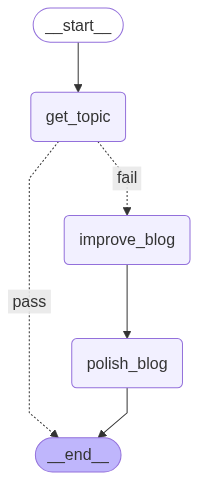

{'final_blog': '<think>\nAlright, I need to add a surprising twist to this blog about the art of living a happy life. The original blog is pretty comprehensive, covering gratitude, mindfulness, relationships, self-care, passions, purpose, positivity, and embracing change. It\'s well-structured and offers practical advice, but it\'s quite traditional. To make it stand out, I should introduce something unexpected that challenges the reader\'s assumptions or offers a fresh perspective.\n\nLet me brainstorm some ideas for twists. Maybe the key to happiness isn\'t just about positive thinking, but also about embracing negative emotions. Or perhaps the idea that failure is crucial for true happiness. Another angle could be the importance of solitude in a world that emphasizes social connections. Or maybe the role of mystery and the unknown in keeping life exciting.\n\nI think the twist that could be most impactful is to challenge the common belief that happiness comes from constant positivit

In [60]:
# Step 2: Build the workflow
workflow = StateGraph(State)

workflow.add_node("get_topic", get_topic)
workflow.add_node("improve_blog", improve_blog)
workflow.add_node("polish_blog", polish_blog)

workflow.add_edge(START, "get_topic")
workflow.add_conditional_edges("get_topic", check_blog, {"fail": "improve_blog", "pass": END})
workflow.add_edge("improve_blog", "polish_blog")
workflow.add_edge("polish_blog", END)

# Step 3: Compile and run
chain = workflow.compile()

# Optional: visualize
display(Image(chain.get_graph().draw_mermaid_png()))

# Step 4: Invoke the workflow
state = chain.invoke({"topic": "Art of living a happy life"})
print(state)
